In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [21]:
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)
add = tf.add(a,b)
sess = tf.Session()
sess.run(add, feed_dict = {a : 3, b : 4})

7

In [22]:
a = tf.Variable(3)
b = tf.Variable(4)
add = tf.add(a,b)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(add)

7

In [29]:
def show99(dan) :
    left = tf.placeholder(tf.int32)
    right = tf.placeholder(tf.int32)
    op = tf.multiply(left, right)
    sess = tf.Session()

    for i in range(1, 10):
        res = sess.run(op, feed_dict={left: dan, right: i})
        print('{} * {} = {}'.format(dan, i, res))      
show99(2)

2 * 1 = 2
2 * 2 = 4
2 * 3 = 6
2 * 4 = 8
2 * 5 = 10
2 * 6 = 12
2 * 7 = 14
2 * 8 = 16
2 * 9 = 18


In [30]:
# w와 b에 대한 초기값을 부여한 상태에서 모델링
w=tf.Variable([.3], tf.float32)
b=tf.Variable([-.3], tf.float32)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
lm=x*w+b
loss=tf.reduce_sum(tf.square(lm-y))

train=tf.train.GradientDescentOptimizer(0.01).\
    minimize(loss)
x_train=[1,2,3,4]
y_train=[0,-1,-2,-3]

#트레이닝 횟수 1000번->모델생성
#생성된 모델의 w, b, loss출력

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    sess.run(train,feed_dict={x:x_train,y:y_train} )

wv, bv, lossv=sess.run([w,b,loss],feed_dict={x:x_train,y:y_train})
print("w값: %s b값:%s loss값:%s" % (wv, bv, lossv))

w값: [-0.9999969] b값:[0.9999908] loss값:5.6999738e-11


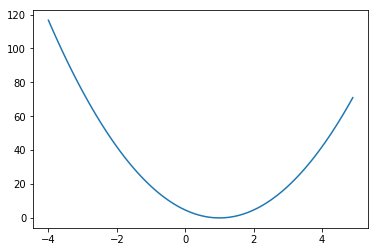

In [27]:
tf.set_random_seed(777)
x = [1,2,3]
y = [1,2,3]
w = tf.placeholder(tf.float32)
hf = x * w
cost = tf.reduce_mean(tf.square(hf-y))
sess = tf.Session()

w_history = []
cost_history = []

for i in range(-40, 50):
    cw = i * 0.1
    cur_cost = sess.run(cost, feed_dict={w : cw})
    w_history.append(cw)
    cost_history.append(cur_cost)
    
plt.plot(w_history, cost_history)
plt.show()

In [28]:
x_data = [1,2,3]
y_data = [1,2,3]
w = tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
hf = x*w
cost = tf.reduce_mean(tf.square(hf - y))
lr = 0.1

# tf.train.GradientDescentOptimizer(0.1).minimize(cost)
gradient = tf.reduce_mean((w*x-y)*x)
descent = w - lr * gradient
update = w.assign(descent) #update를 실행하면 w에 대한 갱신이 수행됨

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21) :
    sess.run(update, feed_dict={x:x_data, y:y_data})
    print(step, sess.run(cost, feed_dict={x:x_data, y:y_data}), sess.run(w))
    

0 2.019275 [0.34219927]
1 0.57437176 [0.6491729]
2 0.16337687 [0.8128922]
3 0.046471626 [0.9002092]
4 0.0132186 [0.94677824]
5 0.0037599516 [0.9716151]
6 0.0010694973 [0.9848614]
7 0.00030421387 [0.9919261]
8 8.6530774e-05 [0.9956939]
9 2.4613573e-05 [0.99770343]
10 7.0009573e-06 [0.9987752]
11 1.9910945e-06 [0.9993468]
12 5.664582e-07 [0.9996516]
13 1.6110177e-07 [0.9998142]
14 4.577254e-08 [0.99990094]
15 1.3037802e-08 [0.99994713]
16 3.712639e-09 [0.9999718]
17 1.0528538e-09 [0.999985]
18 2.9579894e-10 [0.999992]
19 8.594725e-11 [0.9999957]
20 2.3405278e-11 [0.99999774]
